In [1]:
import json
import numpy as np
import os
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
def load_json(filename):
    with open(filename) as f:
        dict_list = [json.loads(line) for line in f]
    return dict_list

result_list = load_json('varying_budget')
df_result = pd.DataFrame(result_list, columns=list(result_list[0].keys()))
df_result.head()
agg_dict = {key: 'mean' for key in result_list[0].keys()}
del agg_dict['ex_identifier']
del agg_dict['task_num']
del agg_dict['agent_num']
del agg_dict['budget']

result_agg = df_result.groupby(['budget'], as_index=False).agg(agg_dict)
show_grouped_result = pd.DataFrame(result_agg)
show_grouped_result

,budget,random_u,random_c,random_t,GreedyNE_u,GreedyNE_c,GreedyNE_t,GreedyNE_iter,CF_u,CF_c,CF_t,CF_iter,GA_u,GA_c,GA_t,GA_iter,int_GA_u,int_GA_iter
0,5,1669.60,494.31,0.003705,3496.08,500.00,0.349593,34.93,5307.93,499.36,0.782196,123.41,3623.14,500.00,29.797163,461.07,2615.52,11.61
1,10,3031.90,993.63,0.006622,5802.39,1000.00,0.468530,71.31,6904.39,998.73,1.155732,190.83,5450.82,1000.00,50.374258,601.51,4104.69,13.27
2,15,4062.04,1492.98,0.009906,7147.62,1500.00,0.617047,110.92,7812.70,1498.35,1.497603,245.92,6710.63,1500.00,73.890016,747.44,5212.63,14.70
3,20,4979.55,1994.35,0.011829,8053.89,2000.00,0.823903,154.85,8382.50,1997.76,1.829181,293.74,7577.41,1999.99,95.812132,861.11,6051.62,15.90
4,25,5696.79,2492.88,0.013669,8610.96,2500.00,1.051889,203.16,8754.46,2498.17,2.078910,336.68,8231.93,2499.93,119.919208,962.46,6684.85,16.12
5,30,6299.00,2992.27,0.015451,8949.43,2997.87,1.419635,260.18,8987.84,2994.71,2.416972,377.95,8670.60,2998.01,141.553790,1017.29,7195.08,16.91


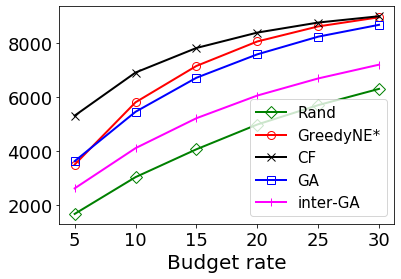

In [3]:
# utility
plt.figure()
x = result_agg['budget']
y1 = result_agg['random_u']
plt.plot(x, y1, 'b-', linewidth=2, color='green', marker='D', fillstyle='none', markersize=8)

y3 = result_agg['GreedyNE_u']
plt.plot(x, y3, 'b-', linewidth=2, color='red', marker='o', fillstyle='none', markersize=8)

y4 = result_agg['CF_u']
plt.plot(x, y4, 'b-', linewidth=2, color='black', marker='x', fillstyle='none', markersize=8)

y5 = result_agg['GA_u']
plt.plot(x, y5, 'b-', linewidth=2, color='blue', marker='s', fillstyle='none', markersize=8)

y7 = result_agg['int_GA_u']
plt.plot(x, y7, 'b-', linewidth=2, color='magenta', marker='|', fillstyle='none', markersize=8)

plt.legend(['Rand', 'GreedyNE*', 'CF', 'GA', 'inter-GA'], fontsize=15)

# plt.ylabel('utility', fontsize=20)
plt.xlabel('Budget rate', fontsize=20)
plt.tick_params(labelsize=18)
# plt.savefig('b_u.pdf',bbox_inches='tight')
#

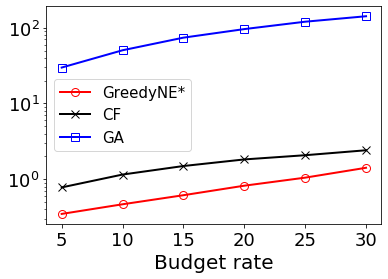

In [4]:
# time
plt.figure()
x = result_agg['budget']

y3 = result_agg['GreedyNE_t']
plt.plot(x, y3, 'b-', linewidth=2, color='red', marker='o', fillstyle='none', markersize=8)

y4 = result_agg['CF_t']
plt.plot(x, y4, 'b-', linewidth=2, color='black', marker='x', fillstyle='none', markersize=8)

y5 = result_agg['GA_t']
plt.plot(x, y5, 'b-', linewidth=2, color='blue', marker='s', fillstyle='none', markersize=8)

plt.legend(['GreedyNE*', 'CF', 'GA'], fontsize=15)
ax = plt.gca()
ax.set_yscale('log')
# plt.ylabel('time', fontsize=20)
plt.xlabel('Budget rate', fontsize=20)
plt.tick_params(labelsize=18)
# plt.savefig('b_t.pdf',bbox_inches='tight')